<center><h2>Python Programming</h2></center>
<center><h2>[Deep Machine Learning Modeling and Geo-Mapping of Yeild Risk]</h2></center>

In [1]:
threshold = 0.2

## Import relevant libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Input, Dropout, MaxPooling1D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.optimizers import Nadam
import geopandas as gpd
import plotly.express as px
from folium import plugins
import folium

2024-06-07 13:22:50.733912: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load data

In [3]:
df_load_train = pd.read_csv("data_train.csv", delimiter=",", encoding="ISO-8859-1", header=0).drop('Unnamed: 0', axis=1)
df_load_test = pd.read_csv("data_test.csv", delimiter=",", encoding="ISO-8859-1", header=0).drop('Unnamed: 0', axis=1)

In [4]:
df_load_train.head()

,N_fertilizer,P_fertilizer,K_fertilizer,Avg_Annual_Rainfall,Avg_Annual_Temp,yield
0,0.912409,0.677419,1.000000,0.018987,0.510078,0.202908
1,0.160584,0.451613,0.666667,0.028047,0.609302,0.113093
2,0.204380,0.666667,0.000000,0.000000,0.623256,0.092847
3,1.000000,0.483871,0.681818,0.029778,0.821705,0.360685
4,0.218978,0.322581,0.454545,0.028047,0.609302,0.194613


In [5]:
df_load_train.shape

(1407, 6)

In [6]:
df_load_test.head

<bound method NDFrame.head of      N_fertilizer  P_fertilizer  K_fertilizer  Avg_Annual_Rainfall  \
0        0.204380      0.666667      0.000000             0.028047   
1        0.000000      0.000000      0.000000             0.028047   
2        0.218978      0.322581      0.454545             0.012812   
3        1.000000      0.483871      0.681818             0.021988   
4        0.978102      1.000000      0.000000             0.033818   
..            ...           ...           ...                  ...   
699      0.160584      0.451613      0.666667             0.028047   
700      1.000000      0.483871      0.681818             0.026835   
701      0.978102      1.000000      0.000000             0.019910   
702      0.978102      1.000000      0.000000             0.039127   
703      0.000000      0.000000      0.000000             0.842798   

     Avg_Annual_Temp     yield  
0           0.609302  0.468783  
1           0.609302  0.093739  
2           0.570543  0.126293

In [7]:
df_load_test.shape

(704, 6)

In [8]:
cols = df_load_test.shape[1]
cols

6

In [9]:
X_train = df_load_train.iloc[:, 0:cols-1]
y_train = df_load_train.iloc[:, cols-1:cols]
X_test = df_load_test.iloc[:, 0:cols-1]
y_test = df_load_test.iloc[:, cols-1:cols]

In [10]:
X_train.shape

(1407, 5)

In [11]:
y_train.shape

(1407, 1)

In [12]:
X_test.shape

(704, 5)

In [13]:
y_test.shape

(704, 1)

Reshape

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [15]:
X_train[0]

array([[0.91240876, 0.67741935, 1.        , 0.01898661, 0.51007752]])

In [16]:
X_test[0]

array([[0.20437956, 0.66666667, 0.        , 0.02804709, 0.60930233]])

## Deep Learning Modeling: Feedfoward Neural Network

In [17]:
model_ANN = Sequential()
model_ANN.add(Input(shape=(1,cols-1)))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dense(1))

model_ANN.compile(optimizer='adam', loss='mean_squared_error')

model_ANN.summary()
#model_ANN = keras.Sequential([
#    layers.Input(shape=(1,cols-1)),        # Input layer
#    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
#    layers.Dense(1)                  # Output layer with a single neuron (for regression)
#])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 100)            600       
                                                                 
 dense_1 (Dense)             (None, 1, 100)            10100     
                                                                 
 dense_2 (Dense)             (None, 1, 100)            10100     
                                                                 
 dense_3 (Dense)             (None, 1, 100)            10100     
                                                                 
 dense_4 (Dense)             (None, 1, 1)              101       
                                                                 
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


2024-06-07 13:22:52.731666: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Train

In [18]:
model_ANN.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
44/44 [==============================] - 1s 10ms/step - loss: 0.0234 - val_loss: 0.0185
Epoch 2/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0195 - val_loss: 0.0183
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0194 - val_loss: 0.0192
Epoch 4/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0194 - val_loss: 0.0184
Epoch 5/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0193 - val_loss: 0.0181
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0194 - val_loss: 0.0181
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.0181
Epoch 8/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.0185
Epoch 9/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0193 - val_loss: 0.0184
Epoch 10/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0189 - val_loss: 0.0184
Epoch 11

### Predict

In [19]:
# Make Predictions and Assess Model #X_train, y_train
test_forecast0 = model_ANN.predict(X_test)

22/22 [==============================] - 0s 2ms/step


### Evaluate

In [20]:
RMSE_DL_Feed_Forw = np.sqrt(mean_squared_error(y_test.to_numpy(), test_forecast0[:,0]))
print('RMSE', RMSE_DL_Feed_Forw)

RMSE 0.1279344413742468


## Deep Learning Modeling: Feedfoward Neural Network + Early Stopping

### Model Configuration

In [21]:
model_ANN = Sequential()
model_ANN.add(Input(shape=(1,cols-1)))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dense(1))

optimizer = Nadam(learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-08)

model_ANN.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_squared_error"])

early_stopping_callback=EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=10
)

callbacks = [early_stopping_callback]

model_ANN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1, 100)            600       
                                                                 
 dense_6 (Dense)             (None, 1, 100)            10100     
                                                                 
 dense_7 (Dense)             (None, 1, 100)            10100     
                                                                 
 dense_8 (Dense)             (None, 1, 100)            10100     
                                                                 
 dense_9 (Dense)             (None, 1, 1)              101       
                                                                 
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


### Train

In [22]:
model_ANN.fit(X_train, y_train, epochs=100, batch_size=32, 
          validation_data=(X_test, y_test), callbacks = callbacks)

Epoch 1/100
44/44 [==============================] - 1s 9ms/step - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 3/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 5/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 6/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 7/100
44/44 [===============

### Predict

In [23]:
# Make Predictions and Assess Model #X_train, y_train
test_forecast1 = model_ANN.predict(X_test)

22/22 [==============================] - 0s 3ms/step


### Evaluate

In [24]:
RMSE_DL_Feed_Forw_Early_Stop = np.sqrt(mean_squared_error(y_test.to_numpy(), test_forecast1[:,0]))
print('RMSE', RMSE_DL_Feed_Forw_Early_Stop)

RMSE 0.1284729260822931


## Deep Learning Modeling: Feedfoward Neural Network + Earlystopping + Dropouts

In [25]:
model_ANN = Sequential()
model_ANN.add(Input(shape=(1,cols-1)))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dropout(0.5))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dropout(0.5))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dropout(0.5))
model_ANN.add(Dense(100, activation='relu'))
model_ANN.add(Dense(1))

model_ANN.compile(loss="mean_squared_error",
              optimizer=optimizer,
              metrics=["mean_squared_error"])

model_ANN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1, 100)            600       
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 dense_11 (Dense)            (None, 1, 100)            10100     
                                                                 
 dropout_1 (Dropout)         (None, 1, 100)            0         
                                                                 
 dense_12 (Dense)            (None, 1, 100)            10100     
                                                                 
 dropout_2 (Dropout)         (None, 1, 100)            0         
                                                                 
 dense_13 (Dense)            (None, 1, 100)           

### Train

In [26]:
# You can adjust the number of epochs and batch size based on your data and resources.
model_ANN.fit(X_train, y_train, epochs=100, batch_size=32, 
          validation_data=(X_test, y_test), callbacks = callbacks)

Epoch 1/100
44/44 [==============================] - 1s 9ms/step - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 2/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 7/100
44/44 [===============

### Predict

In [27]:
test_forecast2 = model_ANN.predict(X_test)

22/22 [==============================] - 0s 2ms/step


### Evaluate

In [28]:
RMSE_DL_Feed_Forw_Early_Stop_DropOut = np.sqrt(mean_squared_error(y_test.to_numpy(), test_forecast2[:,0]))
print('RMSE', (RMSE_DL_Feed_Forw_Early_Stop_DropOut))

RMSE 0.14453584664933858


## Comparing Performances of Deep Machine Learning Models

In [29]:
Models = ["DL","DL + Early Stopping","DL + Early Stopping + Drop Out"]
Scores = [RMSE_DL_Feed_Forw, RMSE_DL_Feed_Forw_Early_Stop, RMSE_DL_Feed_Forw_Early_Stop_DropOut]

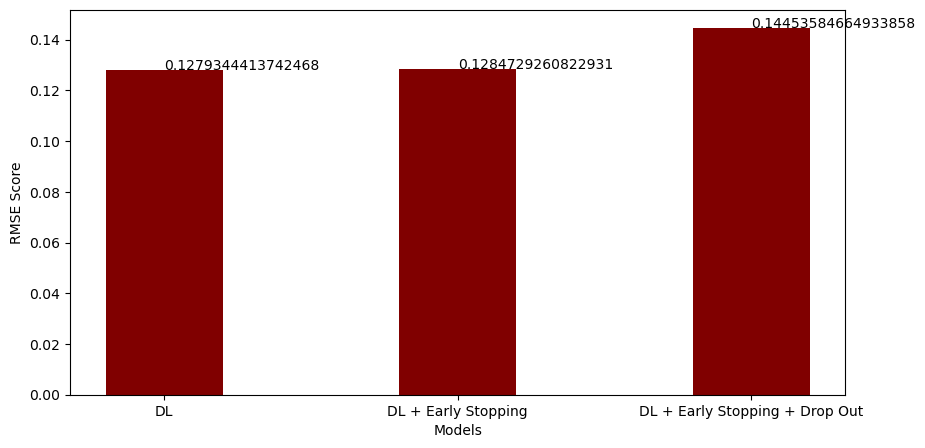

In [43]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models, Scores, color ='maroon', 
        width = 0.4)

for i in range(len(Scores)):
    plt.text(i,Scores[i],Scores[i])
 
plt.xlabel("Models")
plt.ylabel("RMSE Score")
plt.show()

# Predict Yield using Test Values using Optimal Results from Deep Learning

### Loading latitute and longitudes from feature dataset

In [31]:
df_load_thresh = pd.read_csv("data_features_selected.csv", delimiter=",", encoding="ISO-8859-1", header=0).drop('Unnamed: 0', axis=1)

In [32]:
df_load_thresh.columns

Index(['longitude', 'latitude', 'planting_year', 'variety', 'N_fertilizer',
       'P_fertilizer', 'K_fertilizer', 'Avg_Annual_Rainfall',
       'Avg_Annual_Temp', 'yield'],
      dtype='object')

In [33]:
df_load_thresh = df_load_thresh.loc[:,['longitude','latitude']]

In [34]:
df_load_thresh.shape

(2327, 2)

In [35]:
test_forecast0.size

704

In [36]:
start = df_load_thresh.shape[0] - test_forecast0.size - 1
start

1622

In [37]:
data_map = pd.DataFrame(columns =['lon','lat'])
data_map2 = pd.DataFrame(columns =['lon','lat'])

### Using threshold value to set apart low and high yield

In [38]:
count_a = 0
count_b = 0

for a in range(test_forecast0.size):    
    if(test_forecast0[a] < threshold): #low yield
        row_to_append = pd.DataFrame([{'lon':df_load_thresh.longitude[start + a], 'lat':df_load_thresh.latitude[start + a]}])
        data_map = pd.concat([data_map,row_to_append])
        
    else:
        row_to_append = pd.DataFrame([{'lon':df_load_thresh.longitude[start + a], 'lat':df_load_thresh.latitude[start + a]}])
        data_map2 = pd.concat([data_map2,row_to_append])

/tmp/ipykernel_81464/4089118256.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_map2 = pd.concat([data_map2,row_to_append])
/tmp/ipykernel_81464/4089118256.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_map = pd.concat([data_map,row_to_append])


In [39]:
data_map2.shape

(552, 2)

In [40]:
data_map.shape

(152, 2)

# Map trial areas that may have low and high yields

In [41]:
nigeria_location = [9.494899977900419, 6.671357813861899]
m = folium.Map(nigeria_location, zoom_start=7)

group_1 = folium.FeatureGroup("first group").add_to(m)
# add marker one by one on the map
for i in range(0,len(data_map)):
   folium.Marker(
      location=[data_map.iloc[i]['lat'], data_map.iloc[i]['lon']],
      #popup=data_map.iloc[i]['name'],
      icon=folium.Icon("red")
   ).add_to(group_1)

group_2 = folium.FeatureGroup("second group").add_to(m)
for i in range(0,len(data_map2)):
   folium.Marker(
      location=[data_map2.iloc[i]['lat'], data_map2.iloc[i]['lon']],
      #popup=data_map2.iloc[i]['name'],
      icon=folium.Icon("green")
   ).add_to(group_2)
# Show the map again
m